In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

In [2]:
def getz ( weight, features):
    z = np.dot(features, weight.T)
    current_guess = 0
    if (z>0):
        current_guess = 1
    return current_guess

In [3]:
def newweight ( c, desired, z, feature, w):
    coefficient = (c * (desired-z) * feature )
    w = w + coefficient
    count = 0
    if (desired-z == 0):
        count = 1
    return w, count

In [4]:
# Initialize for the data set 
c1 = .00001
c2 = .0001
c3 = .001

In [5]:
# For the Iris dataset
data = pandas.read_csv( 'Fisher.csv' )
m = data.as_matrix()
labels = m[:,0]
labels[ labels == 2 ] = 1  # squash class 2 into class 1
labels = np.atleast_2d( labels ).T
features_init = m[:,1:5]

# Initialization of weights
iris_weights1 = np.random.randn(1,(features_init.shape[1] + 1))/4
iris_weights2 = np.random.randn(1,(features_init.shape[1] + 1))/4
iris_weights3 = np.random.randn(1,(features_init.shape[1] + 1))/4
iris_bias = np.ones((features_init.shape[0],1))

# Connect the bias
features = np.append(features_init, iris_bias, axis=1)

In [6]:
epochlen = 100
normweights1 = np.zeros(epochlen)
normweights2 = np.zeros(epochlen)
normweights3 = np.zeros(epochlen)
accur1 = np.zeros(epochlen)
accur2 = np.zeros(epochlen)
accur3 = np.zeros(epochlen)
for ep in xrange(epochlen):
    a1 = 0
    a2 = 0
    a3 = 0
    for iter in xrange(features.shape[0]):
        z1 = getz(iris_weights1, features[iter])
        z2 = getz(iris_weights2, features[iter])
        z3 = getz(iris_weights3, features[iter])
        iris_weights1, acc1 = newweight(c1, labels[iter], z1, features[iter], iris_weights1)
        iris_weights2, acc2 = newweight(c2, labels[iter], z2, features[iter], iris_weights2)
        iris_weights3, acc3 = newweight(c3, labels[iter], z3, features[iter], iris_weights3)
        a1 += acc1
        a2 += acc2
        a3 += acc3
    epoch1 = iris_weights1[0].reshape((5,1))
    epoch2 = iris_weights2[0].reshape((5,1))
    epoch3 = iris_weights3[0].reshape((5,1))
    normweights1[ep] = abs(np.log10((np.dot(epoch1.T, epoch1))**.5))
    normweights2[ep] = abs(np.log10((np.dot(epoch2.T, epoch2))**.5))
    normweights3[ep] = abs(np.log10((np.dot(epoch3.T, epoch3))**.5))
    accur1[ep] = float(a1)/features.shape[0]
    accur2[ep] = float(a2)/features.shape[0]
    accur3[ep] = float(a3)/features.shape[0]
x = np.arange(100)

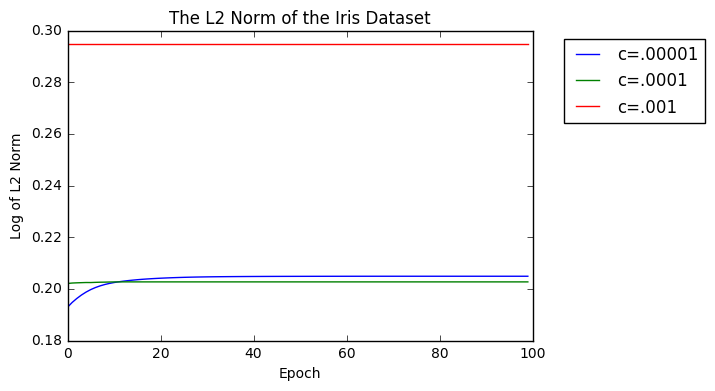

In [7]:
%matplotlib inline

p1= plt.plot(x, normweights1, label="c=.00001")
p2= plt.plot(x, normweights2, label="c=.0001")
p3= plt.plot(x, normweights3, label="c=.001")
plt.title("The L2 Norm of the Iris Dataset")
plt.xlabel("Epoch")
plt.ylabel("Log of L2 Norm")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

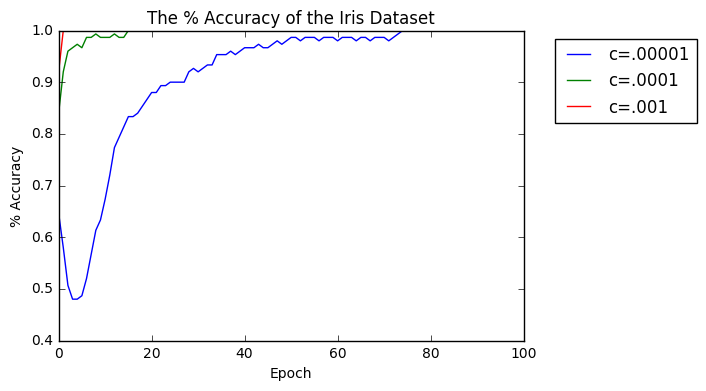

In [9]:
plt.plot(x, accur1, label="c=.00001")
plt.plot(x, accur2, label="c=.0001")
plt.plot(x, accur3, label="c=.001")
plt.title("The % Accuracy of the Iris Dataset")
plt.xlabel("Epoch")
plt.ylabel("% Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [10]:
# Initialize for the data set
c3 = 0.0001
c4 = 0.001

In [11]:
# For the CIFAR dataset 
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features_init = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
labels[ labels < 5 ] = 0
labels[ labels >= 5 ] = 1

# Initialization of weights
cifar_weights3 = np.random.randn(1,(features_init.shape[1] + 1))/4
cifar_weights4 = np.random.randn(1,(features_init.shape[1] + 1))/4
cifar_bias = np.ones((features_init.shape[0],1))

# Connect the bias
features = np.append(features_init, cifar_bias, axis=1)

In [12]:
accur3 = np.zeros(epochlen)
accur4 = np.zeros(epochlen)
normed3 = np.zeros(epochlen)
normed4 = np.zeros(epochlen)
for ep in xrange(epochlen):
    a3 = 0
    a4 = 0
    for iter in xrange(features.shape[0]):
        z3 = getz(cifar_weights3, features[iter])
        z4 = getz(cifar_weights4, features[iter])
        cifar_weights3, acc3 = newweight(c3, labels[iter], z3, features[iter], cifar_weights3)
        cifar_weights4, acc4 = newweight(c4, labels[iter], z4, features[iter], cifar_weights4)
        a3 += acc3
        a4 += acc4
    epoch3 = cifar_weights3[0].reshape((features.shape[1],1))
    epoch4 = cifar_weights4[0].reshape((features.shape[1],1))
    normed3[ep] = abs(np.log10((np.dot(epoch3.T, epoch3))**.5))
    normed4[ep] = abs(np.log10((np.dot(epoch4.T, epoch4))**.5))
    accur3[ep] = float(a3)/features.shape[0]
    accur4[ep] = float(a4)/features.shape[0]
    

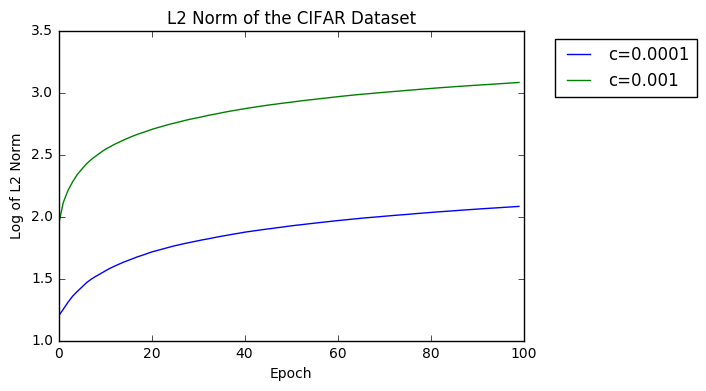

In [13]:
plt.plot(x, normed3, label="c=0.0001")
plt.plot(x, normed4, label="c=0.001")
plt.title("L2 Norm of the CIFAR Dataset")
plt.xlabel("Epoch")
plt.ylabel("Log of L2 Norm")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

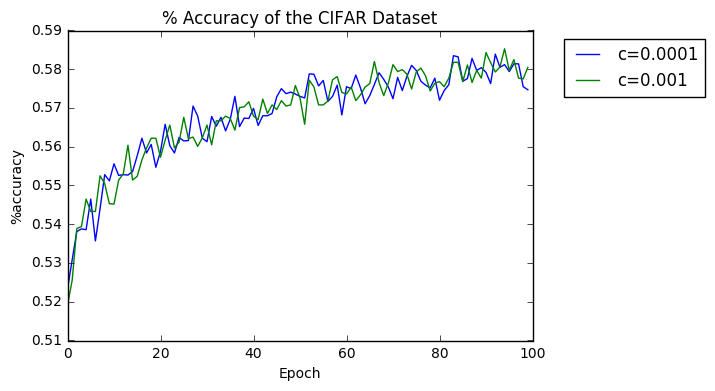

In [14]:
plt.plot(x, accur3, label="c=0.0001")
plt.plot(x, accur4, label="c=0.001")
plt.title("% Accuracy of the CIFAR Dataset")
plt.xlabel("Epoch")
plt.ylabel("%accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)